### ▶ 공공데이터 코로나 시도발생 API
- 공공데이터 검색어 '코로나19'  -> 오픈데이터 (보건복지부_코로나19 시·도발생_현황)
- https://data.go.kr/data/15043378/openapi.do

In [1]:
# url을 가져와서 문서로 만드는 작업
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

In [2]:
key='Jid5jJfVfwuc7brfbSDE6yxusvhmIOTMmmZE%2F%2F%2B2YdeSPIAoRpSnof9qpb5OSeEpyvP8xnb6AO4V7kXVEJFPEQ%3D%3D'
url1='http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson?serviceKey='+key
url2='&pageNo=1&numOfRows=10&startCreateDt=20200410&endCreateDt=20210615'
url=url1+url2
print(url)

http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson?serviceKey=Jid5jJfVfwuc7brfbSDE6yxusvhmIOTMmmZE%2F%2F%2B2YdeSPIAoRpSnof9qpb5OSeEpyvP8xnb6AO4V7kXVEJFPEQ%3D%3D&pageNo=1&numOfRows=10&startCreateDt=20200410&endCreateDt=20210615


In [3]:
xml=requests.get(url)
soup=bs(xml.text,'html.parser')

C:\Users\LG\anaconda3\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [4]:
data=soup.find_all('item')
print(data[0], data[0].createdt.text) #구조 확인용

cont_lst=[]
for item in data:
    createDt=item.find('createdt').text #등록일시
    deathcnt=item.find('deathcnt').text #사망자 수
    defcnt=item.find('defcnt').text #확진자 수
    gubun=item.find('gubun').text #지역
    incdec=item.find('incdec').text #전일대비 증감 
    isolclearcnt=item.find('isolclearcnt').text #격리중환자수
    overflowcnt=item.find('overflowcnt').text #해외유입수
    localocccnt=item.find('localocccnt').text #지역감염

    cont_lst.append({'기준일':createDt, '사망자수':deathcnt,
                    '확진자수':defcnt, '지역':gubun,
                    '전일대비증감':incdec, '격리자수':isolclearcnt,
                    '해외유입수':overflowcnt,'지역감염':localocccnt})  

<item><createdt>2021-06-15 09:00:00.000</createdt><deathcnt>1992</deathcnt><defcnt>148645</defcnt><gubun>합계</gubun><gubuncn>合计</gubuncn><gubunen>Total</gubunen><incdec>373</incdec><isolclearcnt>139720</isolclearcnt><localocccnt>347</localocccnt><overflowcnt>26</overflowcnt><qurrate>286.70</qurrate><seq>9747</seq><stdday>2021년 06월 15일 00시</stdday><updatedt>2021-09-16 10:11:33.897</updatedt></item> 2021-06-15 09:00:00.000


In [5]:
df=pd.DataFrame(cont_lst)
print(df.shape)
df.head()

(8208, 8)


,기준일,사망자수,확진자수,지역,전일대비증감,격리자수,해외유입수,지역감염
0,2021-06-15 09:00:00.000,1992,148645,합계,373,139720,26,347
1,2021-06-15 09:00:00.000,502,46730,서울,131,43637,3,128
2,2021-06-15 09:00:00.000,124,5952,부산,9,5606,3,6
3,2021-06-15 09:00:00.000,222,10454,대구,16,9915,0,16
4,2021-06-15 09:00:00.000,61,6458,인천,12,6194,1,11


## ▶형변환
- 프로그램에서 다루는 자료의 type을 변경하는것을 형변환이라함.
- 구글검색 '파이썬 astype'



In [6]:
# 차트작업 환경세팅
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (15, 6)
import seaborn as sns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8208 entries, 0 to 8207
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준일     8208 non-null   object
 1   사망자수    8208 non-null   object
 2   확진자수    8208 non-null   object
 3   지역      8208 non-null   object
 4   전일대비증감  8208 non-null   object
 5   격리자수    8208 non-null   object
 6   해외유입수   8208 non-null   object
 7   지역감염    8208 non-null   object
dtypes: object(8)
memory usage: 513.1+ KB


In [8]:
df.columns

Index(['기준일', '사망자수', '확진자수', '지역', '전일대비증감', '격리자수', '해외유입수', '지역감염'], dtype='object')

In [9]:
# 형변환
# 기준일, 지역을 제외한 열 자료를 int로 변경함
# for문으로 작성
tmp=['사망자수', '확진자수', '전일대비증감', '격리자수', '해외유입수', '지역감염']
for i in tmp:
    df[tmp]=df[tmp].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8208 entries, 0 to 8207
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준일     8208 non-null   object
 1   사망자수    8208 non-null   int32 
 2   확진자수    8208 non-null   int32 
 3   지역      8208 non-null   object
 4   전일대비증감  8208 non-null   int32 
 5   격리자수    8208 non-null   int32 
 6   해외유입수   8208 non-null   int32 
 7   지역감염    8208 non-null   int32 
dtypes: int32(6), object(2)
memory usage: 320.8+ KB


## ▶차트를 이용한 자료 분포도 확인
- 자료의 기술통계를 통해서 값의 이상치를 확인
- 아래의 기술통계를 통해 max값과 75% 의 값 차이를 확인하며
- boxplot 또는 산점도 차트를 이용하여 각 값의 분포를 확인

In [10]:
# 기술통계 확인
df.describe()

,사망자수,확진자수,전일대비증감,격리자수,해외유입수,지역감염
count,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000
mean,91.011209,5553.175439,33.679825,4905.679825,3.498538,31.447368
std,255.673424,16236.071934,103.146728,14650.254940,70.525718,99.211224
min,0.000000,12.000000,0.000000,4.000000,0.000000,0.000000
25%,1.000000,170.000000,0.000000,149.000000,0.000000,0.000000
50%,8.000000,1034.500000,5.000000,879.000000,0.000000,3.000000
75%,57.000000,3131.250000,17.000000,2786.250000,1.000000,15.000000
max,1992.000000,148645.000000,1240.000000,139720.000000,5863.000000,1215.000000


In [11]:
#지역감염 >=1000 확인
df[df['지역감염']>=1000]

,기준일,사망자수,확진자수,지역,전일대비증감,격리자수,해외유입수,지역감염
3135,2021-01-01 09:00:00.000,917,61753,합계,1027,42929,25,1002
3173,2020-12-30 09:00:00.000,879,59759,합계,1050,41411,25,1025
3192,2020-12-29 09:00:00.000,859,58709,합계,1044,40685,16,1028
3249,2020-12-26 09:00:00.000,793,55889,합계,1131,38514,28,1103
3268,2020-12-25 09:00:00.000,773,54758,합계,1240,38028,25,1215
3306,2020-12-23 09:00:00.000,739,52533,합계,1090,36710,32,1058
3363,2020-12-20 09:00:00.000,674,49653,합계,1096,34709,25,1071
3382,2020-12-19 09:00:00.000,659,48557,합계,1045,34322,21,1024
3401,2020-12-18 09:00:00.000,645,47512,합계,1064,33966,26,1038
3439,2020-12-16 09:00:00.000,612,45434,합계,1078,32934,24,1054


In [12]:
# 지역의 vaues_counts()확인
df['지역'].value_counts()

합계    432
강원    432
제주    432
경남    432
경북    432
전남    432
전북    432
충남    432
충북    432
경기    432
서울    432
세종    432
울산    432
대전    432
광주    432
인천    432
대구    432
부산    432
검역    432
Name: 지역, dtype: int64

In [13]:
df.head()

,기준일,사망자수,확진자수,지역,전일대비증감,격리자수,해외유입수,지역감염
0,2021-06-15 09:00:00.000,1992,148645,합계,373,139720,26,347
1,2021-06-15 09:00:00.000,502,46730,서울,131,43637,3,128
2,2021-06-15 09:00:00.000,124,5952,부산,9,5606,3,6
3,2021-06-15 09:00:00.000,222,10454,대구,16,9915,0,16
4,2021-06-15 09:00:00.000,61,6458,인천,12,6194,1,11


In [14]:
df[df['지역']=='검역']

,기준일,사망자수,확진자수,지역,전일대비증감,격리자수,해외유입수,지역감염
18,2021-06-15 09:00:00.000,5,3964,검역,9,3783,9,0
37,2021-06-14 09:00:00.000,5,3955,검역,16,3769,16,0
56,2021-06-13 09:00:00.000,5,3939,검역,17,3768,17,0
75,2021-06-12 09:00:00.000,5,3922,검역,9,3768,9,0
94,2021-06-11 09:00:00.000,5,3913,검역,4,3762,4,0
...,...,...,...,...,...,...,...,...
8131,2020-04-14 09:00:00.000,0,389,검역,7,5,7,0
8150,2020-04-13 09:00:00.000,0,382,검역,6,4,6,0
8169,2020-04-12 09:00:00.000,0,376,검역,18,4,18,0
8188,2020-04-11 09:00:00.000,0,358,검역,6,4,6,0


In [15]:
#지역에 '합계'또는 '검역'이 포함된 행 삭제하고 기초통계 확인
df=df[(df['지역']!='검역')&(df['지역']!='합계' )]
print(df.shape)
df.head()

(7344, 8)


,기준일,사망자수,확진자수,지역,전일대비증감,격리자수,해외유입수,지역감염
1,2021-06-15 09:00:00.000,502,46730,서울,131,43637,3,128
2,2021-06-15 09:00:00.000,124,5952,부산,9,5606,3,6
3,2021-06-15 09:00:00.000,222,10454,대구,16,9915,0,16
4,2021-06-15 09:00:00.000,61,6458,인천,12,6194,1,11
5,2021-06-15 09:00:00.000,23,2872,광주,4,2806,1,3


In [16]:
#지역에 '합계'또는 '검역'이 포함된 행 삭제하고 기초통계 확인
df=df[(df['지역']!='검역')|(df['지역']!='합계' )]
print(df.shape)
df.head()

(7344, 8)


,기준일,사망자수,확진자수,지역,전일대비증감,격리자수,해외유입수,지역감염
1,2021-06-15 09:00:00.000,502,46730,서울,131,43637,3,128
2,2021-06-15 09:00:00.000,124,5952,부산,9,5606,3,6
3,2021-06-15 09:00:00.000,222,10454,대구,16,9915,0,16
4,2021-06-15 09:00:00.000,61,6458,인천,12,6194,1,11
5,2021-06-15 09:00:00.000,23,2872,광주,4,2806,1,3


In [17]:
df.describe()

,사망자수,확진자수,전일대비증감,격리자수,해외유입수,지역감염
count,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000
mean,50.774237,2986.159722,18.328704,2644.113834,1.233932,17.572440
std,104.338100,6573.449007,45.216068,5922.831758,21.622345,44.239997
min,0.000000,12.000000,0.000000,4.000000,0.000000,0.000000
25%,1.000000,155.000000,0.000000,134.000000,0.000000,0.000000
50%,8.000000,825.500000,4.000000,652.000000,0.000000,3.000000
75%,54.000000,2569.250000,14.000000,2247.000000,1.000000,13.000000
max,648.000000,46730.000000,552.000000,43637.000000,1515.000000,550.000000


In [18]:
# 기준일에서 '년', '월' 추출하여 새로운 열로 추가
df['연도']=df['기준일'].str[:4]
df['월']=df['기준일'].str[5:7]
df.head()

,기준일,사망자수,확진자수,지역,전일대비증감,격리자수,해외유입수,지역감염,연도,월
1,2021-06-15 09:00:00.000,502,46730,서울,131,43637,3,128,2021,06
2,2021-06-15 09:00:00.000,124,5952,부산,9,5606,3,6,2021,06
3,2021-06-15 09:00:00.000,222,10454,대구,16,9915,0,16,2021,06
4,2021-06-15 09:00:00.000,61,6458,인천,12,6194,1,11,2021,06
5,2021-06-15 09:00:00.000,23,2872,광주,4,2806,1,3,2021,06


##  ▶기준일을 날짜형식의  자료로 변경합니다.
- 컴퓨터는 년-월-일의 형식 또는 년/월/일의 형식으로 되어 있는 자료를 날짜로 인지함.
- 그러나 2010-01-01 로 되어 있어도 type이 object 이면 문자 자료임(object)
- year, month, day 함수를 사용할수 있는 날짜형식으로 변환하여 작업하면 편리함.
- 여러방법이 있으나 판다스를 사용하고 있음으로 판다스의 pandas.to_datetime 메서드 이용할수 있음.
- 아래는 pandas.to_datetime 메서드 doc
- https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_datetime.html

In [19]:
df['기준일']=pd.to_datetime(df['기준일'].str[:11])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7344 entries, 1 to 8206
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일     7344 non-null   datetime64[ns]
 1   사망자수    7344 non-null   int32         
 2   확진자수    7344 non-null   int32         
 3   지역      7344 non-null   object        
 4   전일대비증감  7344 non-null   int32         
 5   격리자수    7344 non-null   int32         
 6   해외유입수   7344 non-null   int32         
 7   지역감염    7344 non-null   int32         
 8   연도      7344 non-null   object        
 9   월       7344 non-null   object        
dtypes: datetime64[ns](1), int32(6), object(3)
memory usage: 459.0+ KB


In [21]:
df.head(3)

,기준일,사망자수,확진자수,지역,전일대비증감,격리자수,해외유입수,지역감염,연도,월
1,2021-06-15,502,46730,서울,131,43637,3,128,2021,06
2,2021-06-15,124,5952,부산,9,5606,3,6,2021,06
3,2021-06-15,222,10454,대구,16,9915,0,16,2021,06


In [22]:
#dt.year, dt.month, dt.day, dt.day_name
df['요일']=df['기준일'].dt.day_name()

In [23]:
df.head()

,기준일,사망자수,확진자수,지역,전일대비증감,격리자수,해외유입수,지역감염,연도,월,요일
1,2021-06-15,502,46730,서울,131,43637,3,128,2021,06,Tuesday
2,2021-06-15,124,5952,부산,9,5606,3,6,2021,06,Tuesday
3,2021-06-15,222,10454,대구,16,9915,0,16,2021,06,Tuesday
4,2021-06-15,61,6458,인천,12,6194,1,11,2021,06,Tuesday
5,2021-06-15,23,2872,광주,4,2806,1,3,2021,06,Tuesday


In [24]:
df_s=df.sort_values('전일대비증감')

### seaborn 차트 그리기

In [25]:
import seaborn as sns
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)
plt.rcParams["figure.figsize"] = (8, 5)

In [26]:
df.head()

,기준일,사망자수,확진자수,지역,전일대비증감,격리자수,해외유입수,지역감염,연도,월,요일
1,2021-06-15,502,46730,서울,131,43637,3,128,2021,06,Tuesday
2,2021-06-15,124,5952,부산,9,5606,3,6,2021,06,Tuesday
3,2021-06-15,222,10454,대구,16,9915,0,16,2021,06,Tuesday
4,2021-06-15,61,6458,인천,12,6194,1,11,2021,06,Tuesday
5,2021-06-15,23,2872,광주,4,2806,1,3,2021,06,Tuesday


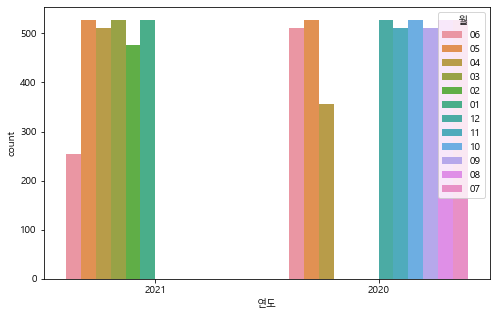

<AxesSubplot:xlabel='count', ylabel='연도'>

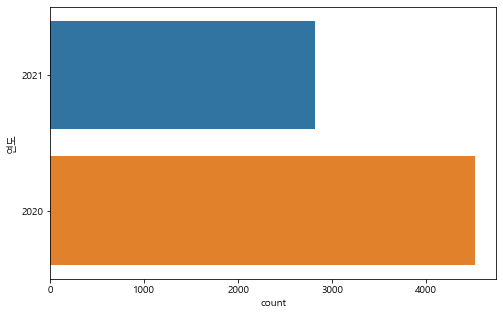

In [27]:
# 차트 그리기(범주형)
sns.countplot(x='연도',hue='월', data=df) #세로방향
plt.show()
sns.countplot(y='연도', data=df)

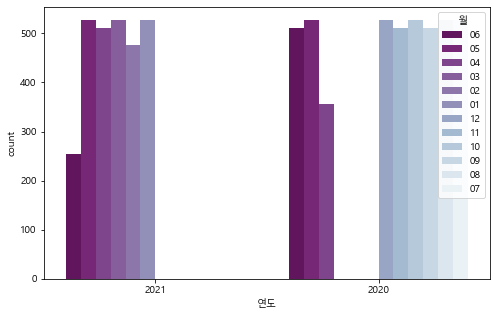

In [28]:
# palette 설정
sns.countplot(x='연도',hue='월', palette='BuPu_r', data=df) #세로방향
plt.show()

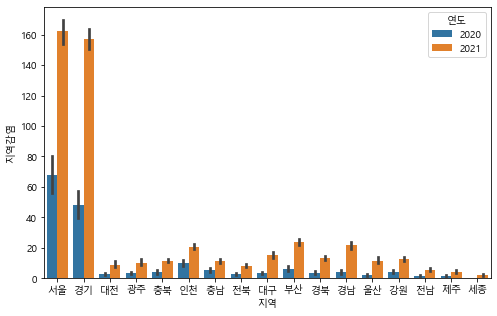

<AxesSubplot:xlabel='지역감염', ylabel='지역'>

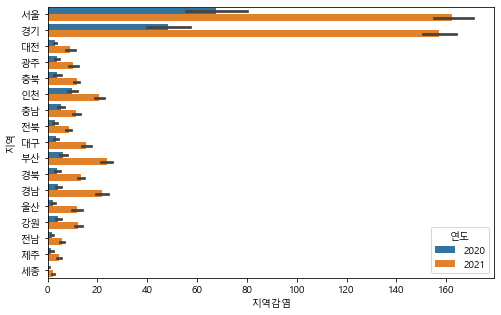

In [29]:
'''
막대그래프 (barplot)
'''
df_s=df.sort_values('지역감염',ascending=False)
sns.barplot(x='지역',y='지역감염',hue='연도', data=df_s) # 세로막데
plt.show()

sns.barplot(y='지역',x='지역감염',hue='연도', data=df_s) #가로막대

<AxesSubplot:xlabel='지역', ylabel='확진자수'>

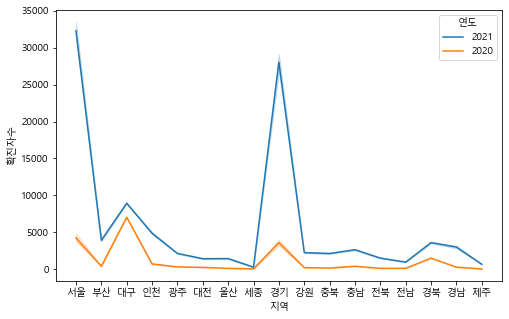

In [30]:
#라인차트 그리기
sns.lineplot(x='지역',y='확진자수',hue='연도', data=df)

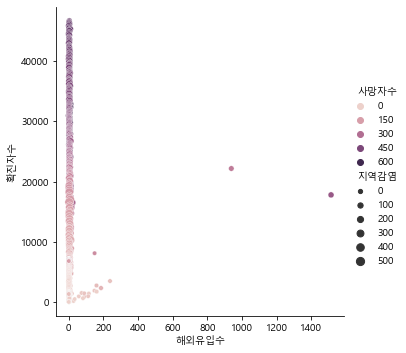

In [31]:
'''
relplot
산점도는 2개 이상의 연속형 변수를 비교할 때 편리
'''
sns.relplot(x='해외유입수',y='확진자수', size='지역감염',hue='사망자수',data=df)

In [32]:
df.head()

,기준일,사망자수,확진자수,지역,전일대비증감,격리자수,해외유입수,지역감염,연도,월,요일
1,2021-06-15,502,46730,서울,131,43637,3,128,2021,06,Tuesday
2,2021-06-15,124,5952,부산,9,5606,3,6,2021,06,Tuesday
3,2021-06-15,222,10454,대구,16,9915,0,16,2021,06,Tuesday
4,2021-06-15,61,6458,인천,12,6194,1,11,2021,06,Tuesday
5,2021-06-15,23,2872,광주,4,2806,1,3,2021,06,Tuesday


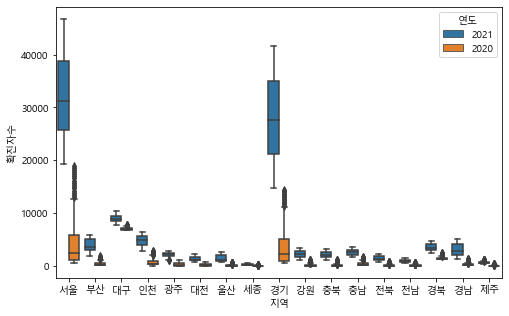

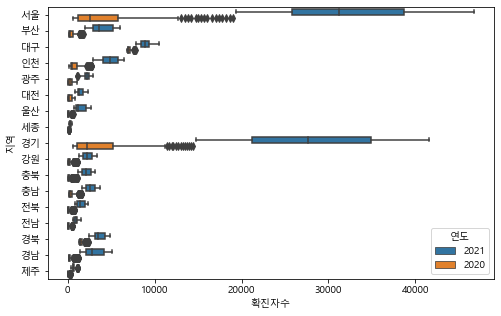

In [33]:
'''
박스플랏(boxplot)
'''
sns.boxplot(x='지역',y='확진자수', hue='연도',data=df) #가로모양
plt.show()

sns.boxplot(y='지역',x='확진자수', hue='연도',data=df) #세로모양
plt.show()


C:\Users\LG\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


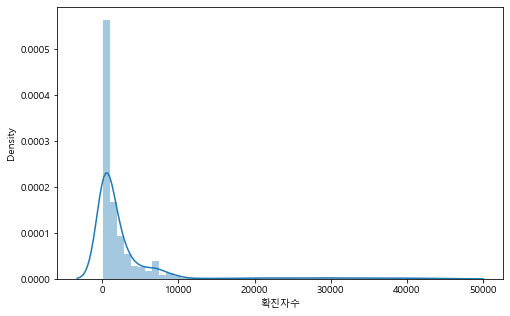

C:\Users\LG\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='격리자수', ylabel='Density'>

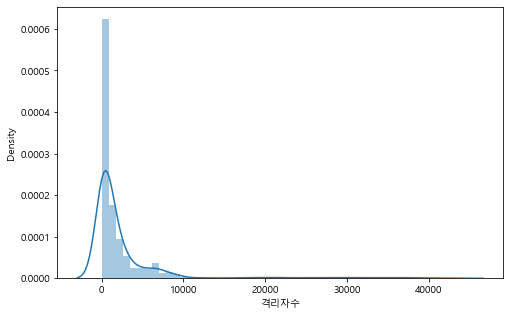

In [34]:
'''
히스토그램(distplot)

'''
sns.distplot(df['확진자수'],kde=True)
plt.show()

sns.distplot(df['격리자수'],kde=True)

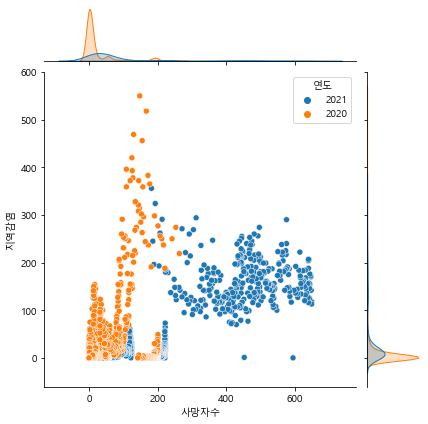

In [36]:
'''
조인트 플랏(jointplot) :산점도+분포
'''
sns.jointplot(x='사망자수',y='지역감염',hue='연도',data=df)

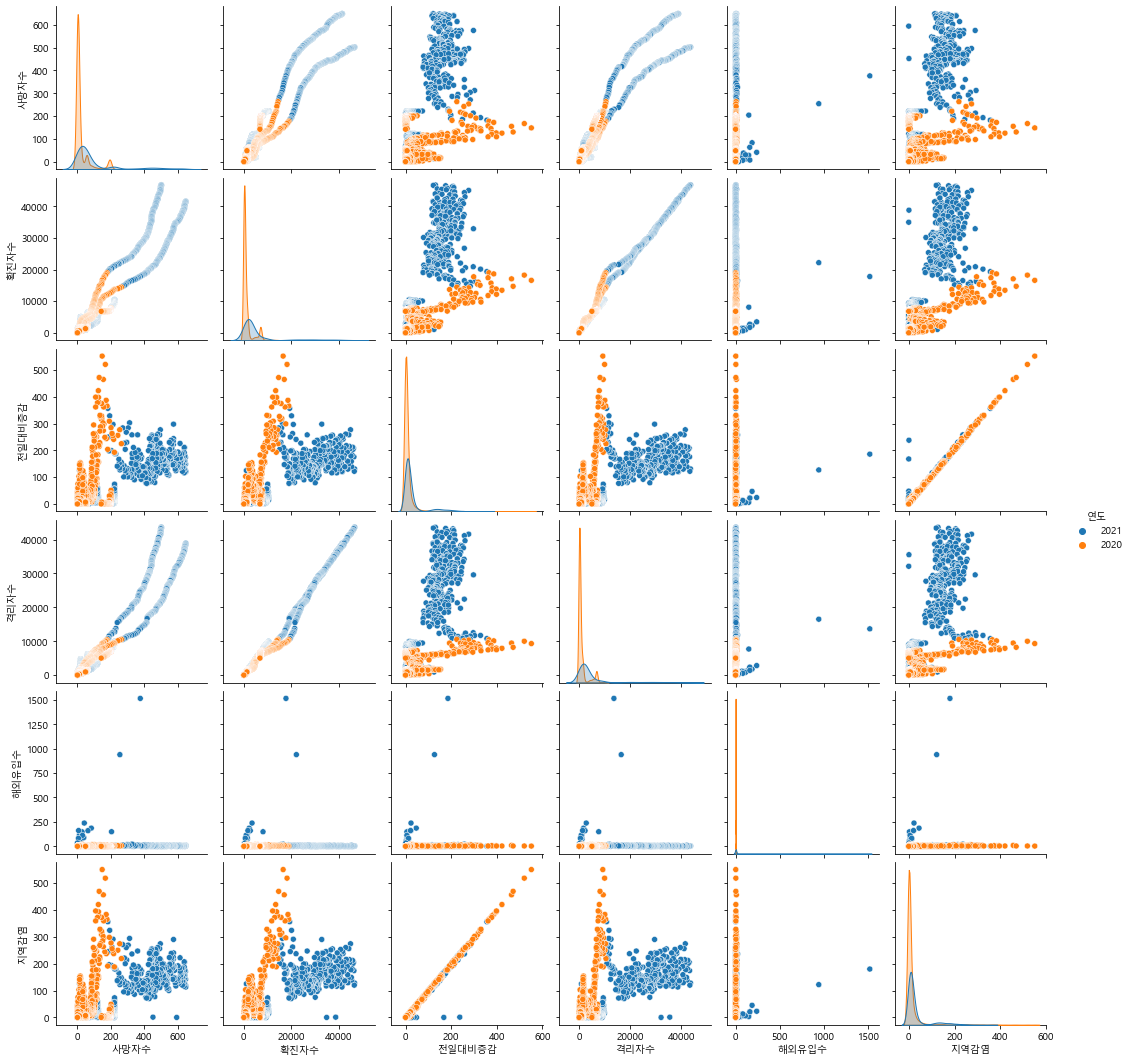

In [37]:
'''
페어플랏(pairplot)

'''
sns.pairplot(df,hue='연도')

<AxesSubplot:>

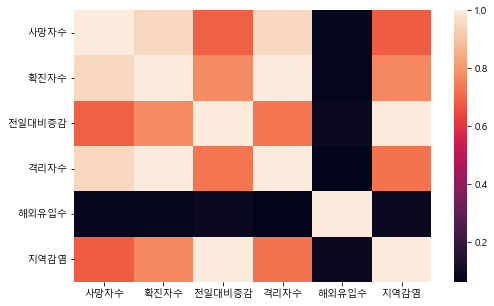

In [38]:
#히트맵(heatmap)


df_c=df.corr()
sns.heatmap(df_c)

In [39]:
df.head()

,기준일,사망자수,확진자수,지역,전일대비증감,격리자수,해외유입수,지역감염,연도,월,요일
1,2021-06-15,502,46730,서울,131,43637,3,128,2021,06,Tuesday
2,2021-06-15,124,5952,부산,9,5606,3,6,2021,06,Tuesday
3,2021-06-15,222,10454,대구,16,9915,0,16,2021,06,Tuesday
4,2021-06-15,61,6458,인천,12,6194,1,11,2021,06,Tuesday
5,2021-06-15,23,2872,광주,4,2806,1,3,2021,06,Tuesday


Text(0.5, 1.0, '지역별 격리자 수')

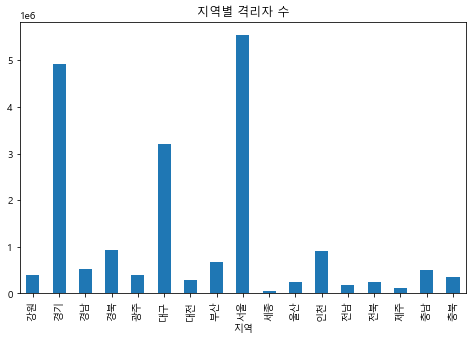

In [40]:
#### 지역단위로 그룹해서 격리자수를 합계내고 차트도 작성하여 봅니다.
df.groupby('지역')['격리자수'].sum().plot(kind='bar')
plt.title('지역별 격리자 수')

Text(0.5, 1.0, '지역별 격리자 수')

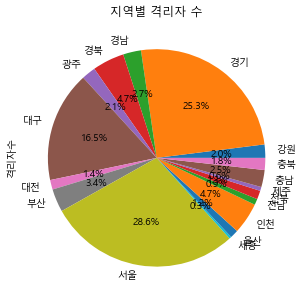

In [41]:
### 원차트로도 작성하세요.



df.groupby('지역')['격리자수'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('지역별 격리자 수')




In [42]:
df.groupby('지역')['격리자수'].sum()

지역
강원     385593
경기    4916000
경남     518261
경북     921187
광주     404914
대구    3198222
대전     277211
부산     665093
서울    5553349
세종      60870
울산     238423
인천     905301
전남     172094
전북     249912
제주     113251
충남     491669
충북     347022
Name: 격리자수, dtype: int32

Text(0.5, 1.0, '지역별 격리자 수')

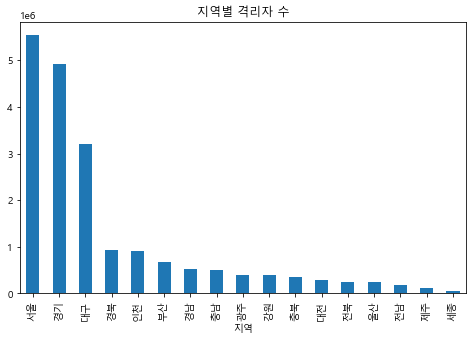

In [43]:
###합계가 많은 순으로 정리하고 차트를 다시 작성세요.



df.groupby('지역')['격리자수'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('지역별 격리자 수')




In [44]:
#지역별 확진자 수의 기술통계(descfibe)확인
df.groupby('지역').describe().stack(0)

25%    50%      75%  count     max        mean   min          std
지역                                                                            
강원 격리자수    64.00  261.0  1713.25  432.0  3191.0  892.576389  23.0   992.650972
   사망자수     3.00    3.0    41.00  432.0    51.0   18.273148   1.0    19.465227
   전일대비증감   0.00    4.0    13.00  432.0    55.0    7.687500   0.0     9.452631
   지역감염     0.00    4.0    12.00  432.0    55.0    7.363426   0.0     9.171471
   해외유입수    0.00    0.0     0.00  432.0    74.0    0.384259   0.0     3.583351
...          ...    ...      ...    ...     ...         ...   ...          ...
충북 사망자수     0.00    3.0    58.00  432.0    69.0   23.467593   0.0    28.384318
   전일대비증감   0.00    2.5    11.00  432.0   103.0    7.215278   0.0    10.401118
   지역감염     0.00    2.0    10.00  432.0   103.0    6.886574   0.0    10.295567
   해외유입수    0.00    0.0     0.00  432.0    89.0    0.504630   0.0     4.311532
   확진자수    72.75  205.5  1748.50  432.0  3162.0  934.104167  45.0  1032.346448

[102 rows x 8 columns]

In [46]:
#지역별, 연도, 월별 해외 유입수 합계 

df.groupby(['연도','월','지역'])['해외유입수'].agg(['sum','mean','max','min','count'])

sum      mean  max  min  count
연도   월  지역                                
2020 04 강원    2  0.095238    1    0     21
        경기   29  1.380952    6    0     21
        경남    0  0.000000    0    0     21
        경북    1  0.047619    1    0     21
        광주    3  0.142857    2    0     21
...         ...       ...  ...  ...    ...
2021 06 전남    0  0.000000    0    0     15
        전북    2  0.133333    1    0     15
        제주    4  0.266667    2    0     15
        충남    8  0.533333    2    0     15
        충북    2  0.133333    1    0     15

[255 rows x 5 columns]

### 실습

In [47]:
plt.rcParams['figure.figsize'] = (15, 6)

<AxesSubplot:xlabel='지역', ylabel='확진자수'>

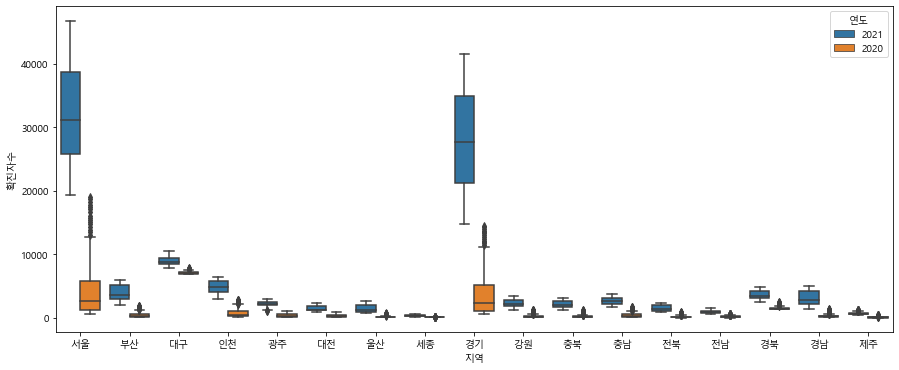

In [48]:
# 지역별, 확진자 수 연도별 비교
sns.boxplot(x='지역',y='확진자수',hue='연도',data=df)

<AxesSubplot:xlabel='요일', ylabel='확진자수'>

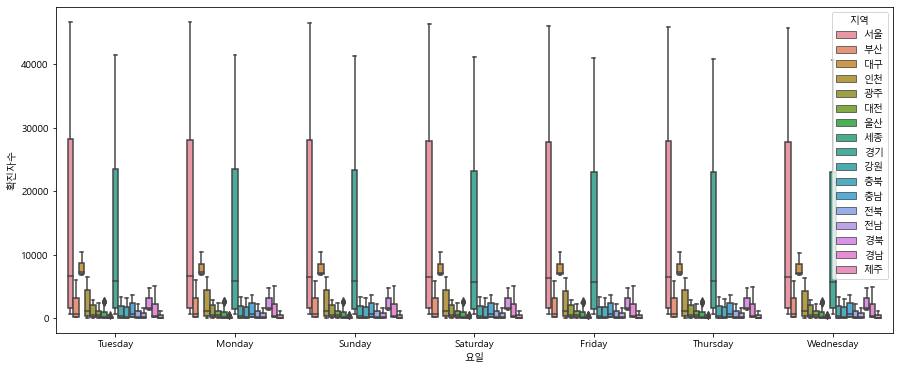

In [49]:
# 요인별, 확진자 수 연도별 비교
sns.boxplot(x='요일',y='확진자수',hue='지역',data=df)

# 지역별로 분리하여서 각 값들의  boxplot확인하기

--------- 서울 -----------


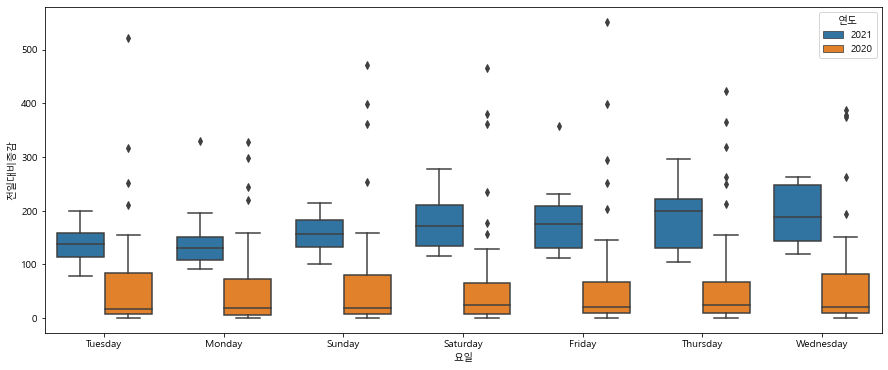

--------- 부산 -----------


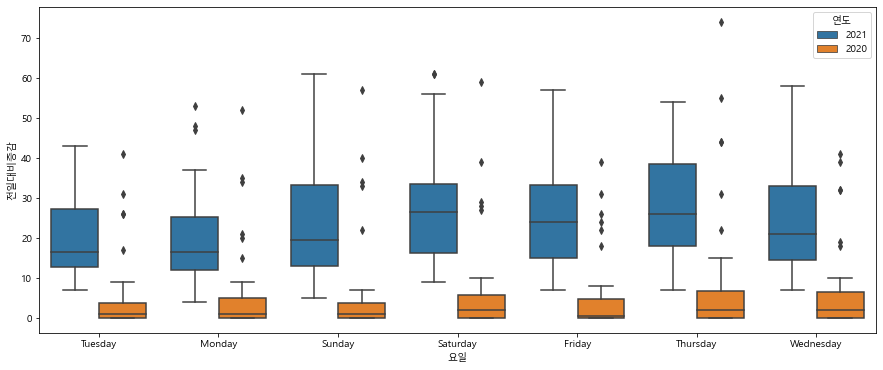

--------- 대구 -----------


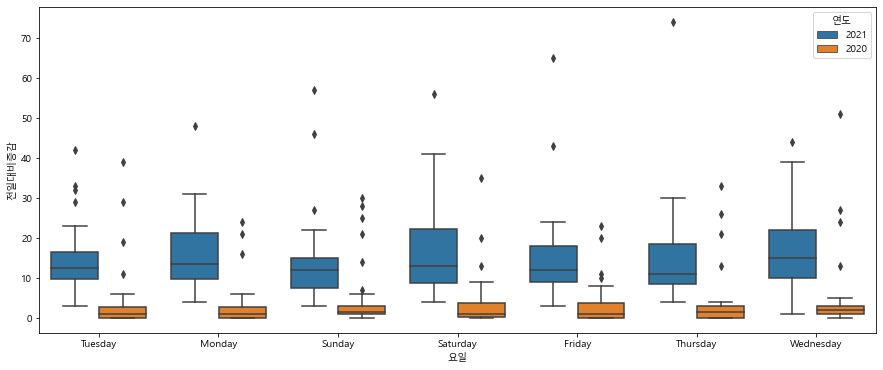

--------- 인천 -----------


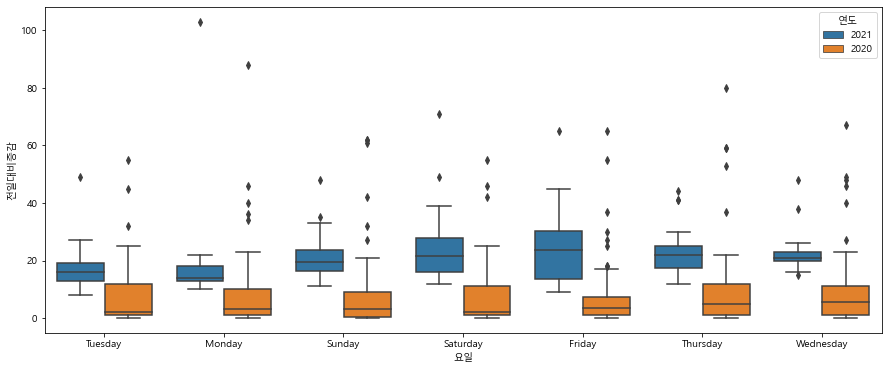

--------- 광주 -----------


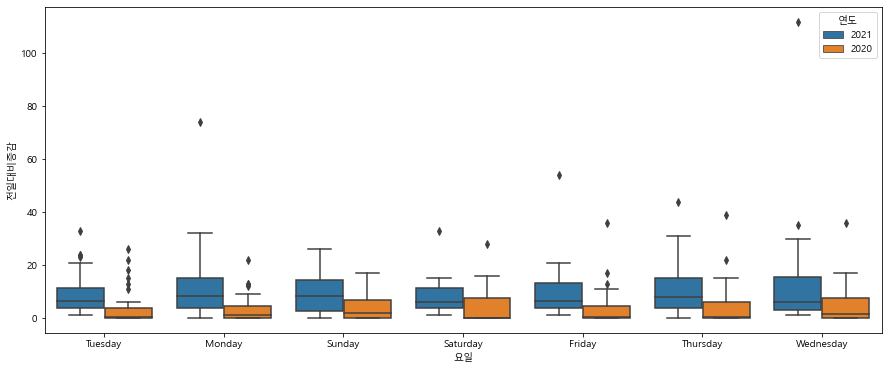

--------- 대전 -----------


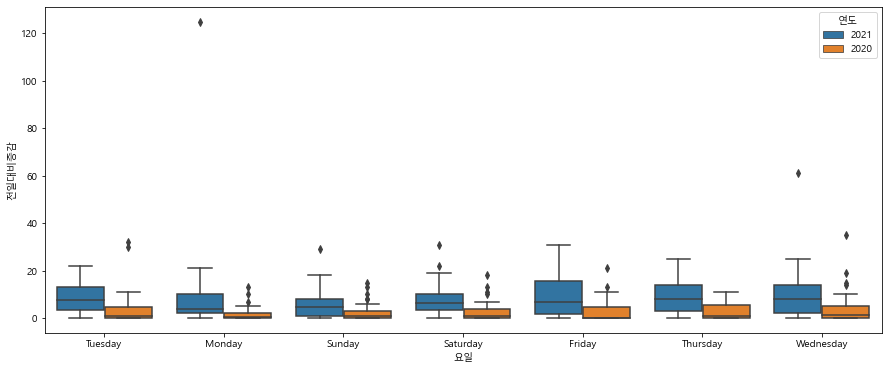

--------- 울산 -----------


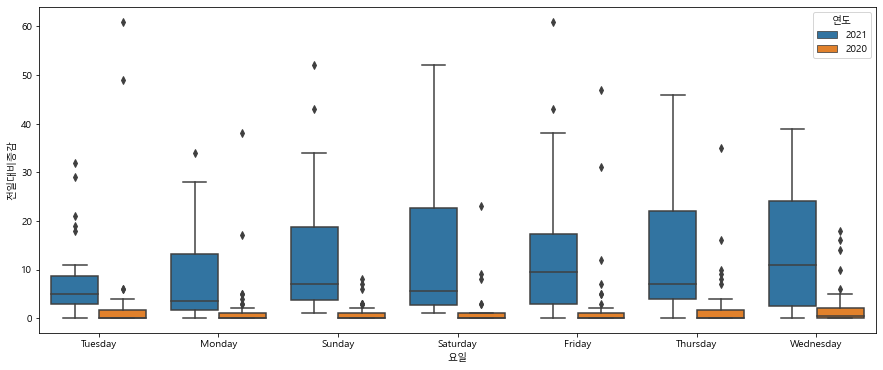

--------- 세종 -----------


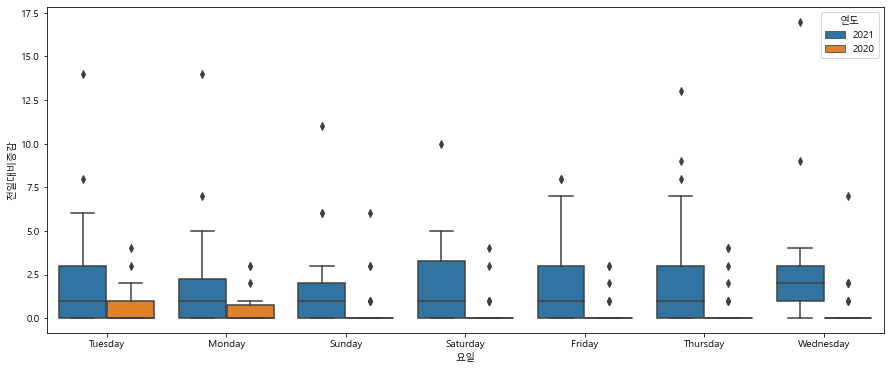

--------- 경기 -----------


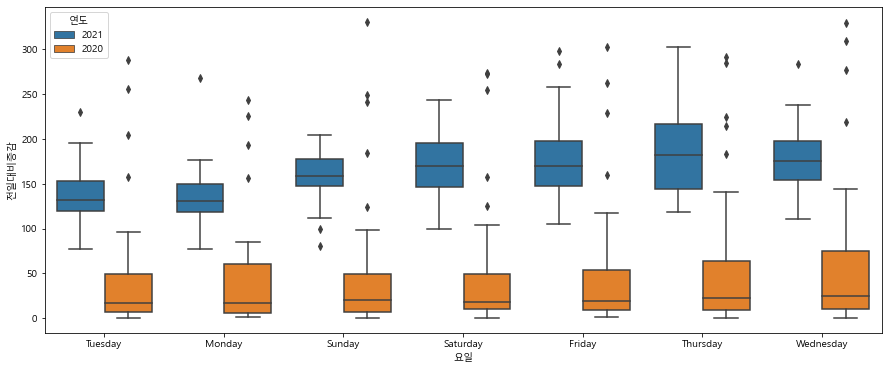

--------- 강원 -----------


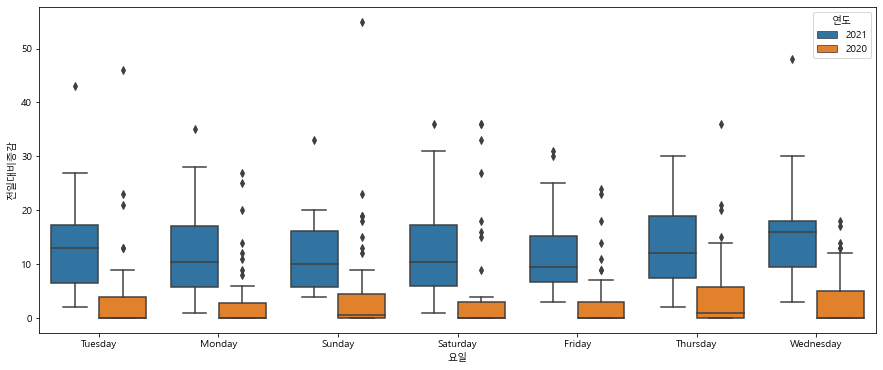

--------- 충북 -----------


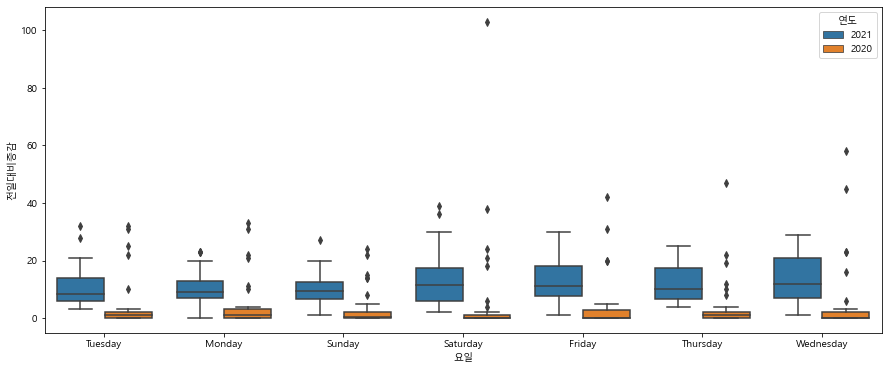

--------- 충남 -----------


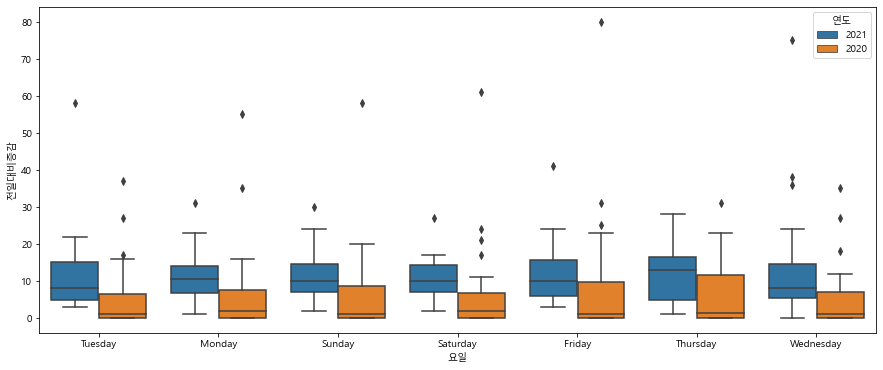

--------- 전북 -----------


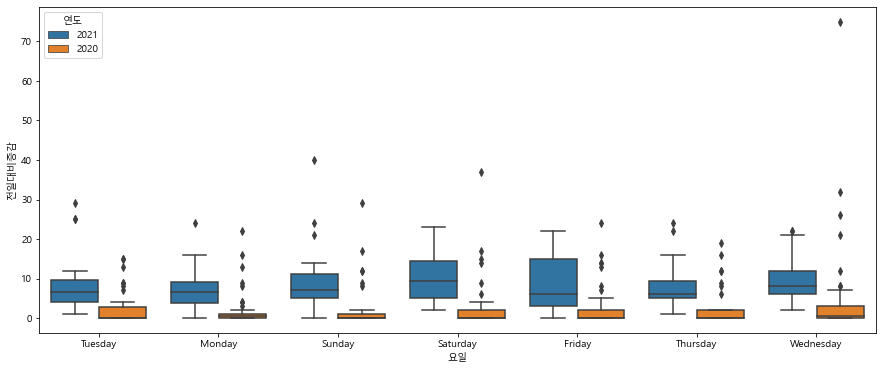

--------- 전남 -----------


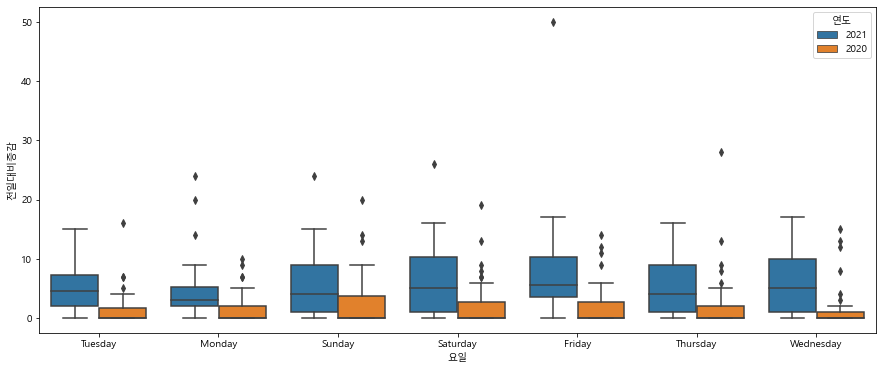

--------- 경북 -----------


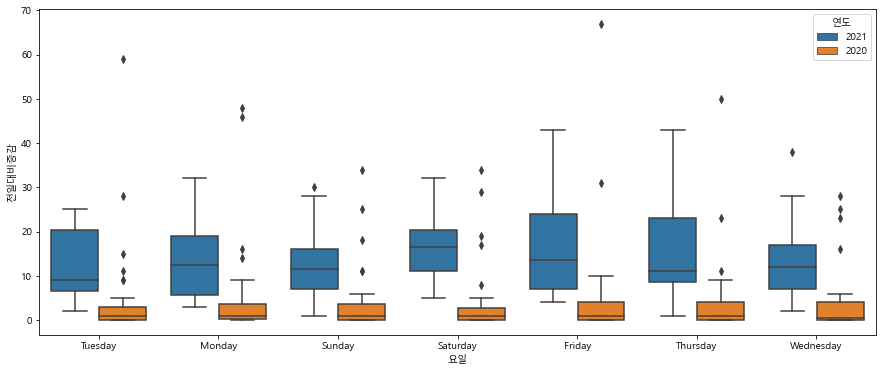

--------- 경남 -----------


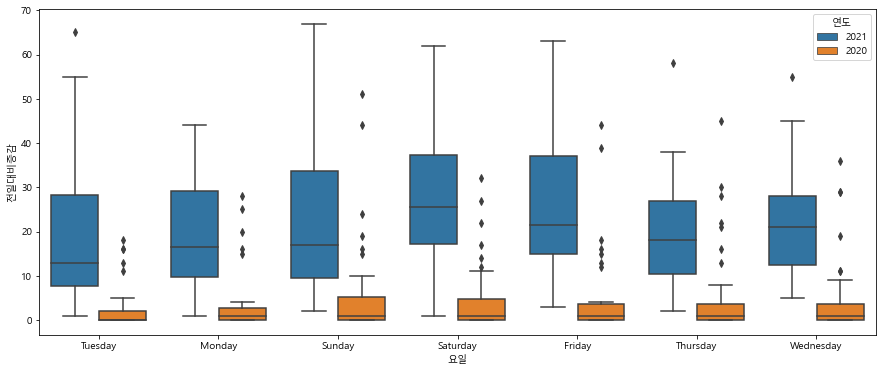

--------- 제주 -----------


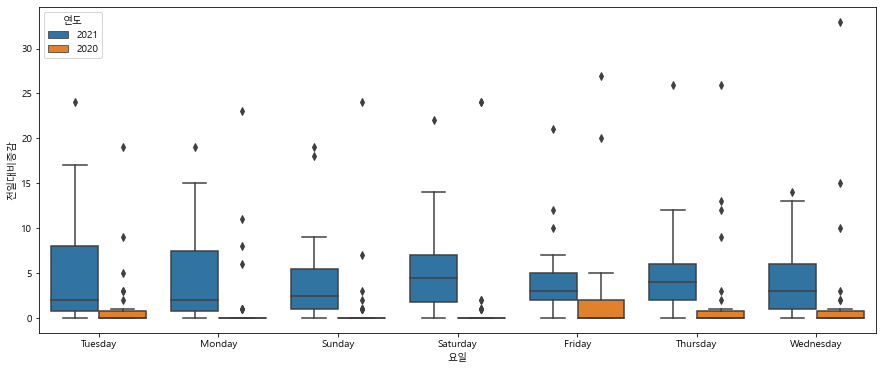

In [50]:
item=df['지역'].unique()
item
for i in item:
    tmp=df[df['지역']==i]
    print(f'--------- {i} -----------')
    sns.boxplot(x='요일',y='전일대비증감', hue='연도', data=tmp)
    plt.show()

# ▶지역별 이용하여 집계하고 차트화


In [51]:
tmp=df.groupby('지역').sum()
tmp

,사망자수,확진자수,전일대비증감,격리자수,해외유입수,지역감염
지역,,,,,,
강원,7894,440341,3321,385593,166,3181
경기,101558,5611343,40934,4916000,3307,38975
경남,2363,580369,4934,518261,355,4713
경북,26879,1003620,3502,921187,388,3235
광주,3667,446162,2845,404914,264,2688
대구,86008,3360313,3647,3198222,344,3445
대전,3503,310321,2325,277211,114,2251
부산,19914,764441,5827,665093,394,5595
서울,76325,6489557,46140,5553349,1894,44947


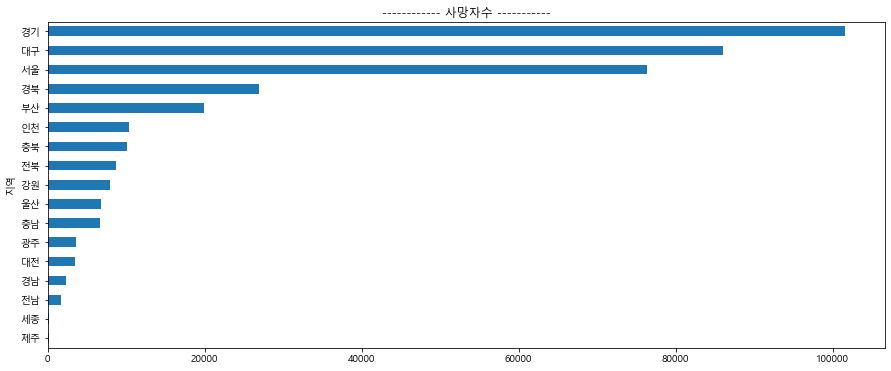

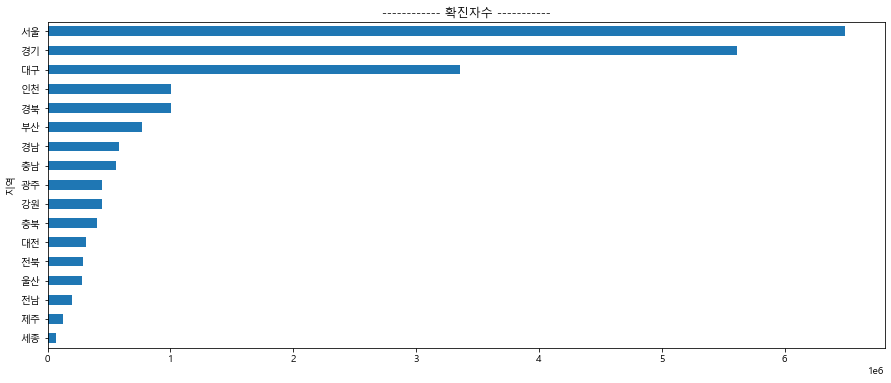

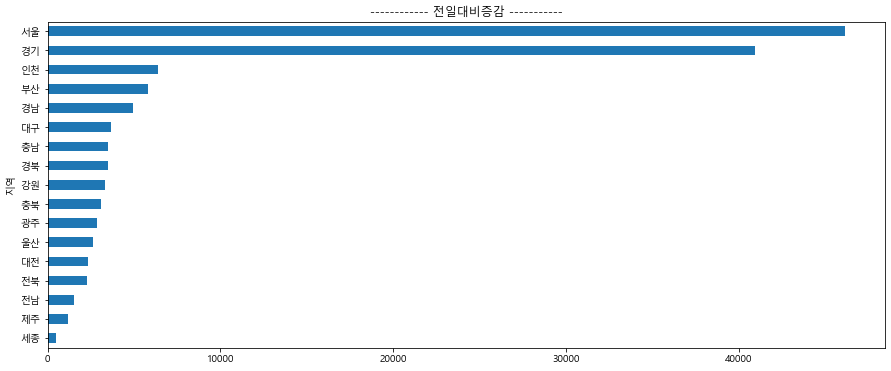

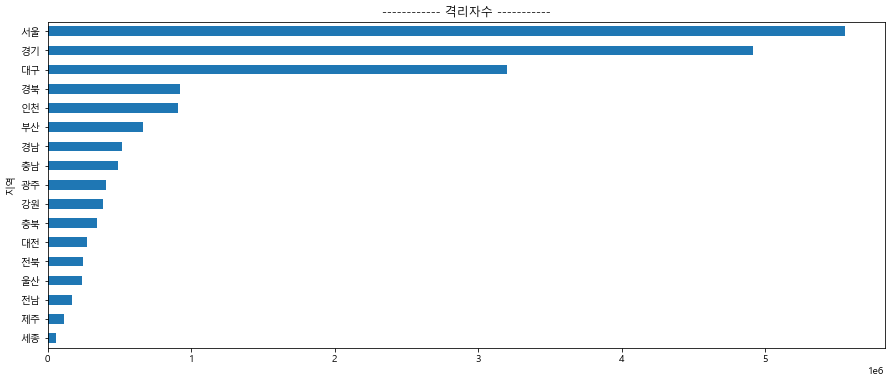

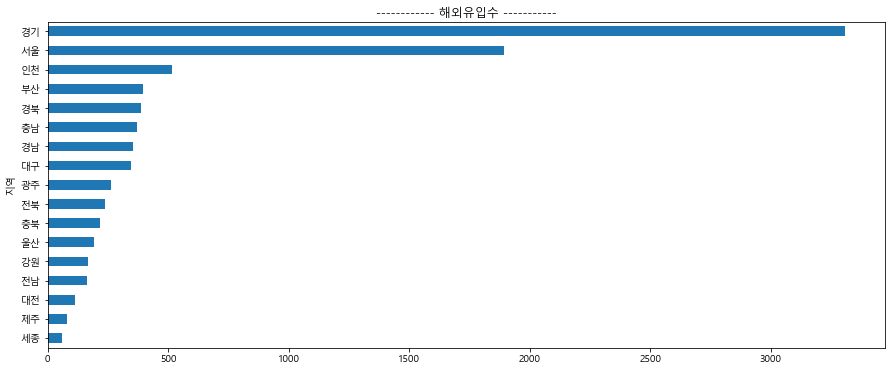

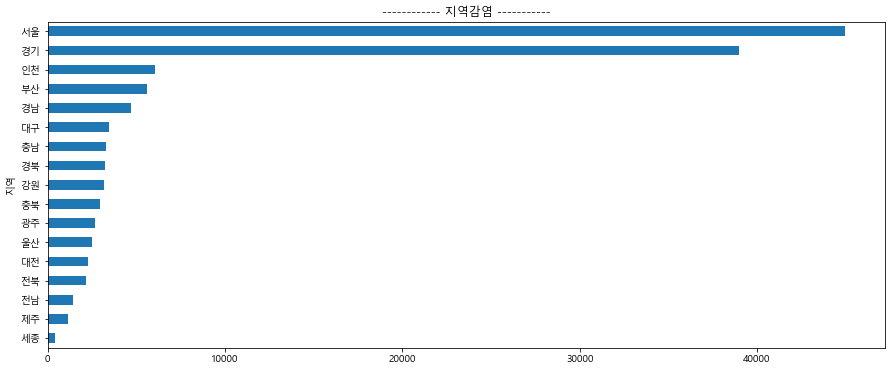

In [52]:
#지역별 집계한 데이터 각 항목별 차트 그리기
item=tmp.columns

for i in item:
    tmp[i].sort_values().plot(kind='barh')
    plt.title(f'------------ {i} -----------')
    plt.show()

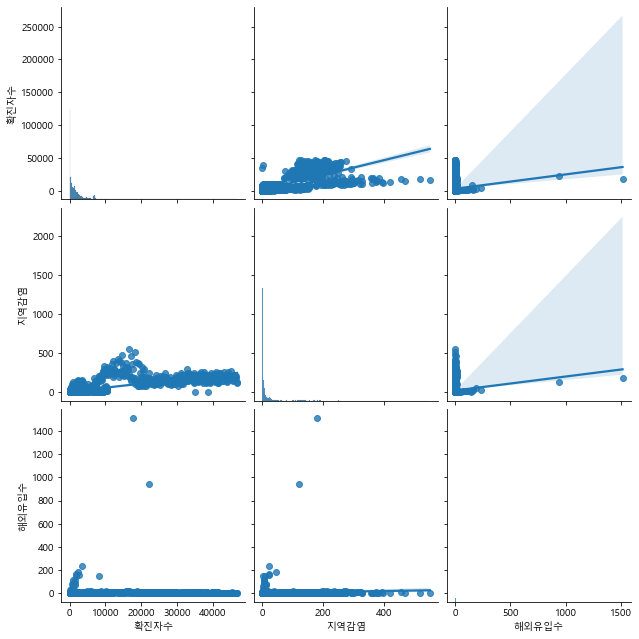

In [53]:
# 확진자, 지역감염, 해외유입의 상관도를 확인해보자
# https://jfun.tistory.com/217?category=828812
sns.pairplot(df, vars=['확진자수', '지역감염', '해외유입수'], kind='reg', height=3)

## ▶날짜데이터를 이용한 자료의 변화량 확인
- seaboarn 패키지의 라인플롯을 그리면 신뢰구간 영역을 포함해서 그려줌

<AxesSubplot:xlabel='기준일', ylabel='확진자수'>

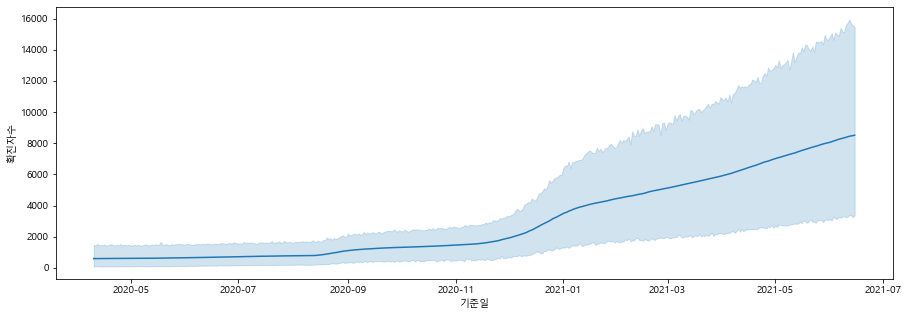

In [56]:
plt.figure(figsize = (15,5))
sns.lineplot(x='기준일',y='확진자수',data=df)

------------서울---------


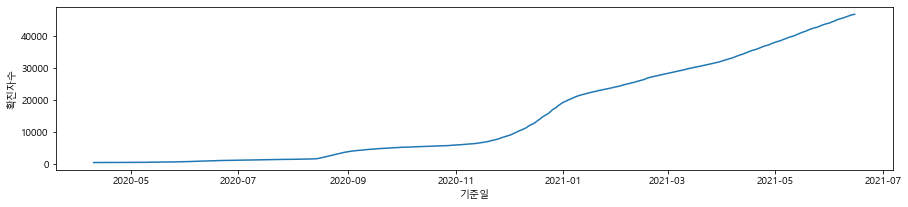

------------부산---------


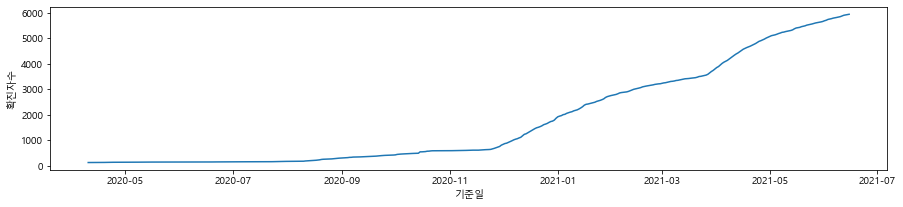

------------대구---------


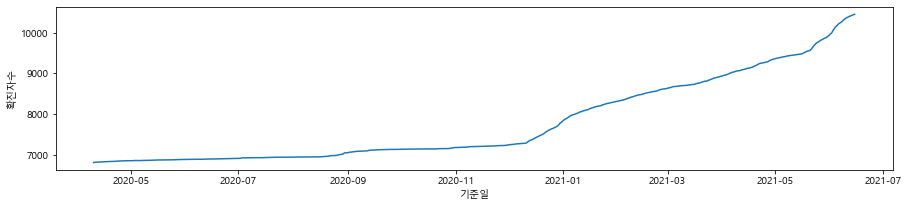

------------인천---------


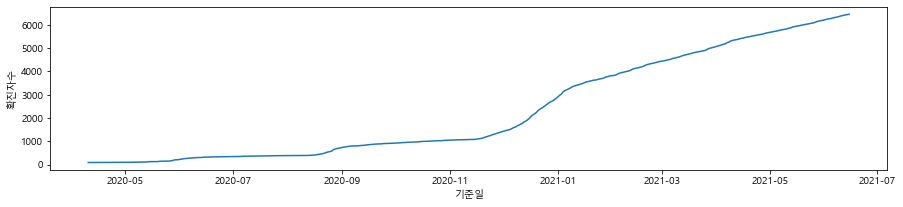

------------광주---------


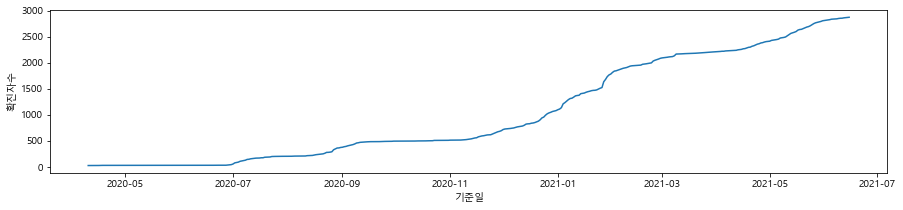

------------대전---------


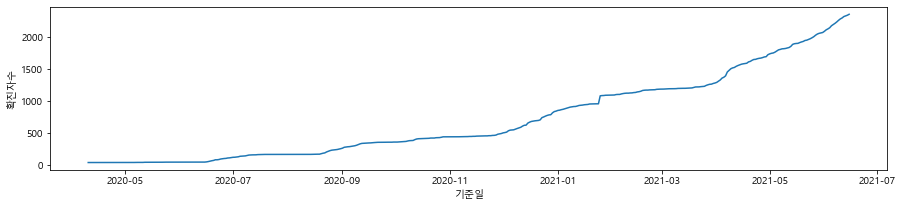

------------울산---------


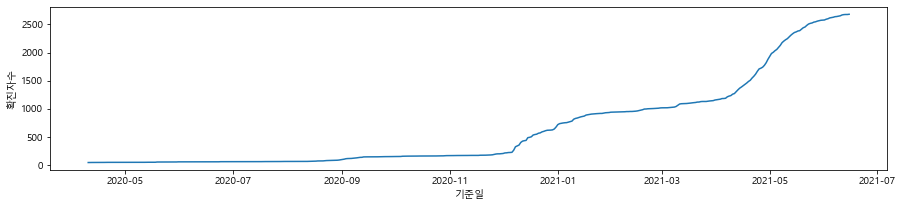

------------세종---------


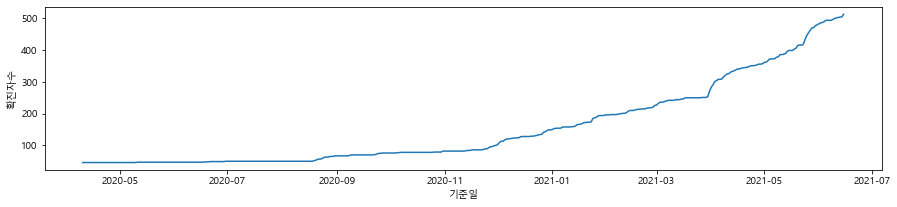

------------경기---------


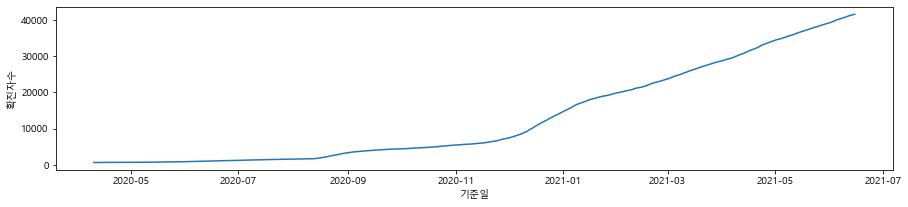

------------강원---------


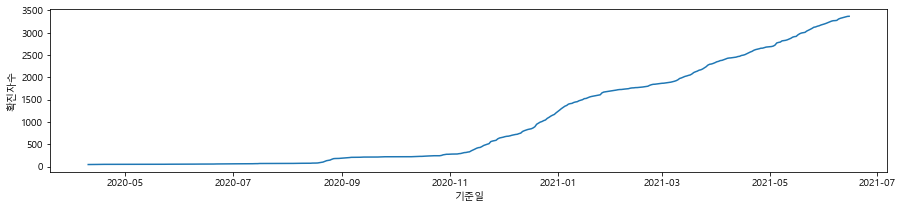

------------충북---------


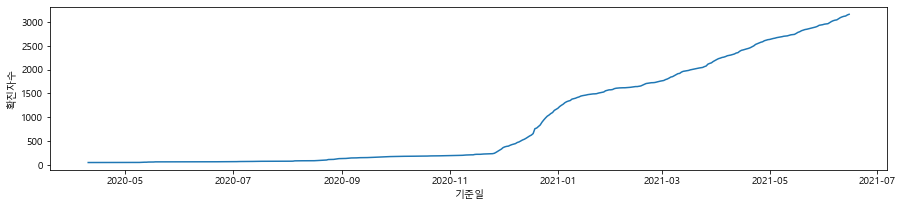

------------충남---------


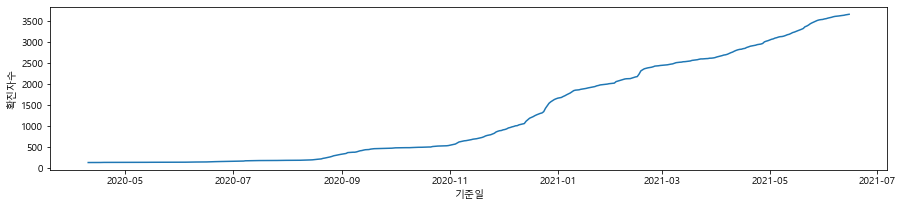

------------전북---------


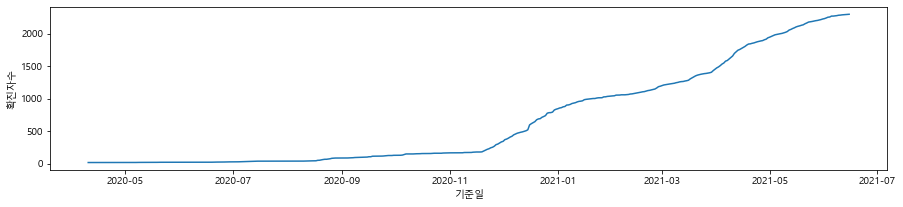

------------전남---------


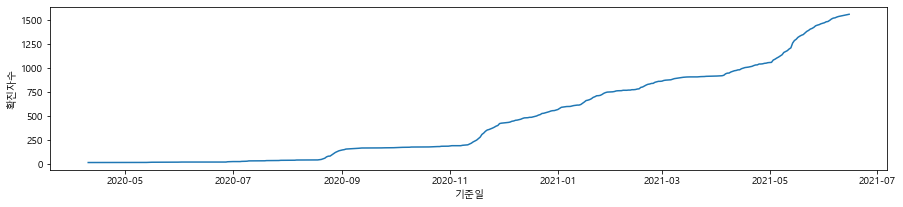

------------경북---------


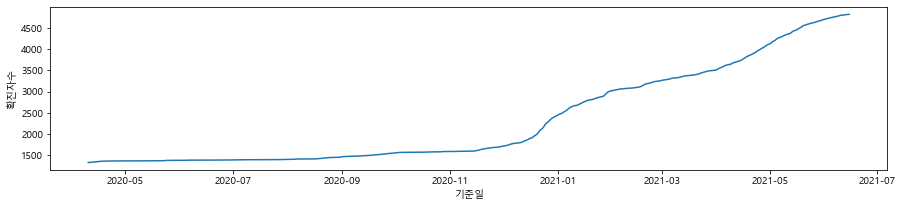

------------경남---------


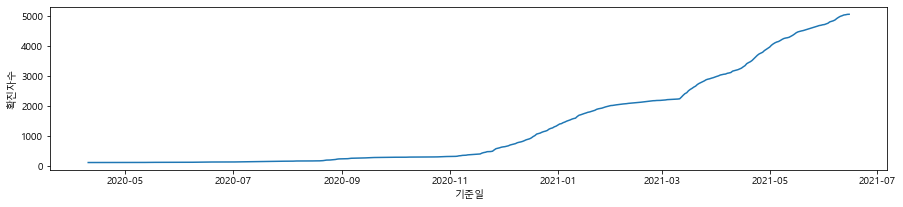

------------제주---------


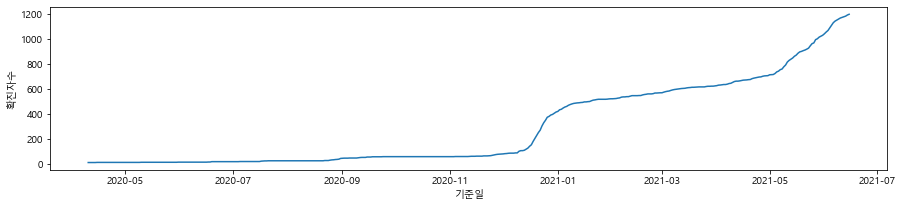

In [57]:
# 지역단위로 그리기
itemList=df['지역'].unique()

for item in itemList:
    plt.figure(figsize = (15,3))
    tmp=df[df['지역']==item]
    print('------------%s---------'%item)
    sns.lineplot(x='기준일',y='확진자수',data=tmp)
    plt.show()

------------서울---------


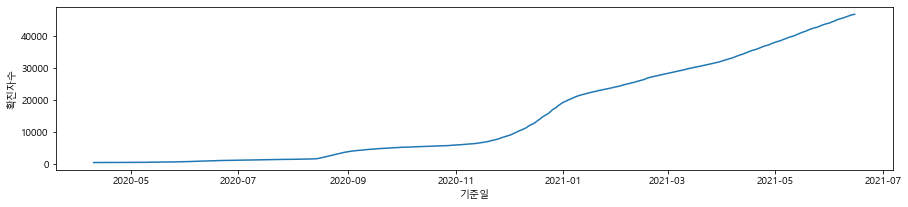

------------부산---------


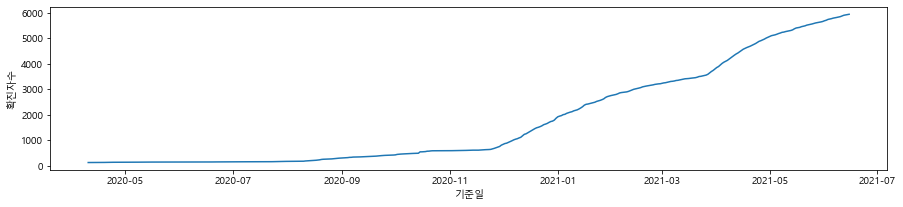

------------대구---------


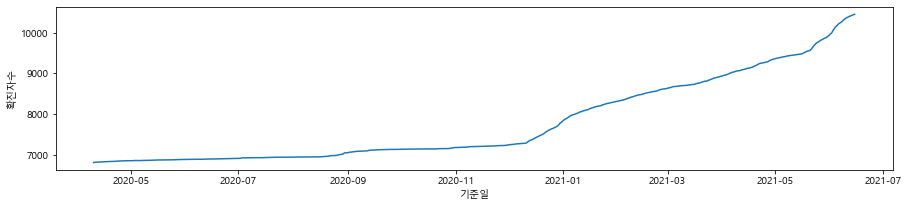

------------인천---------


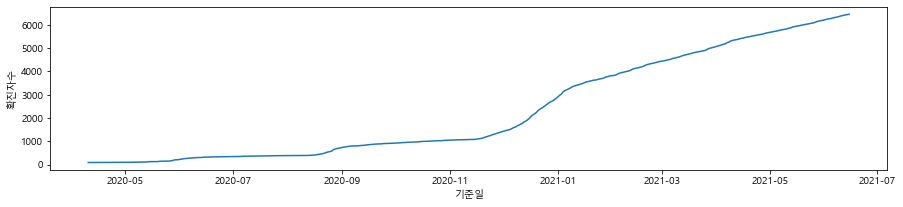

------------광주---------


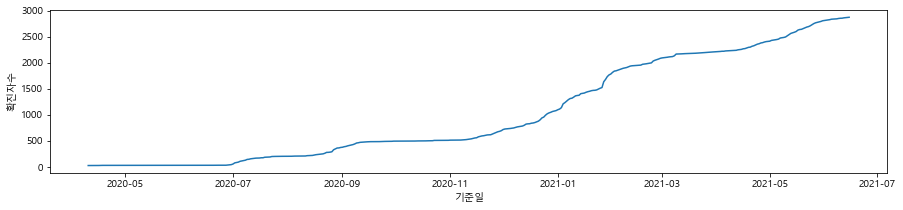

------------대전---------


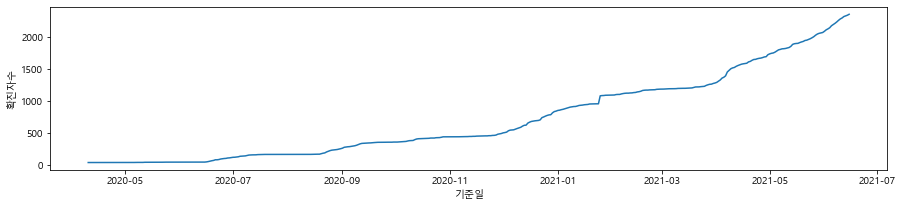

------------울산---------


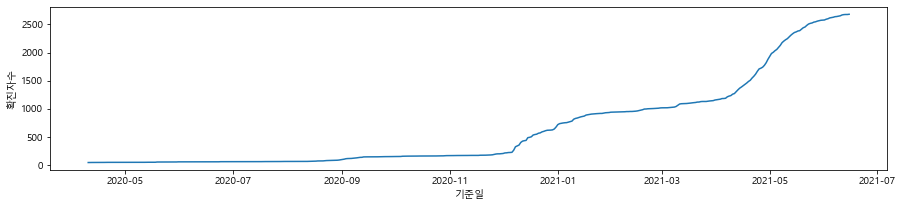

------------세종---------


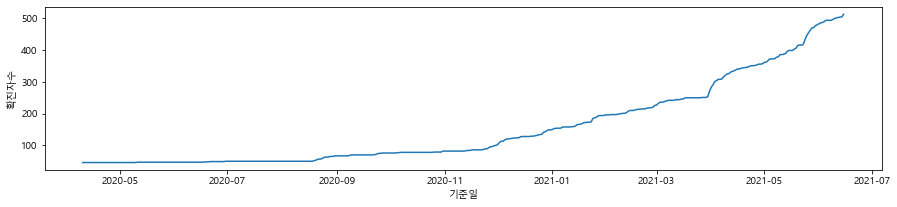

------------경기---------


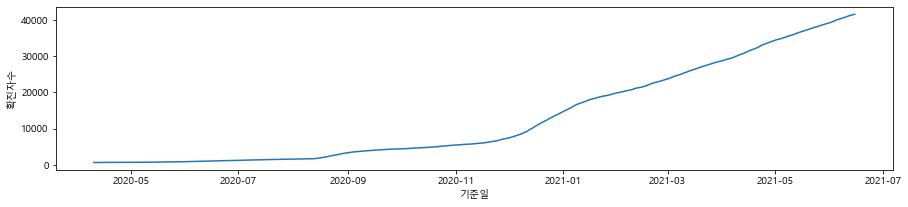

------------강원---------


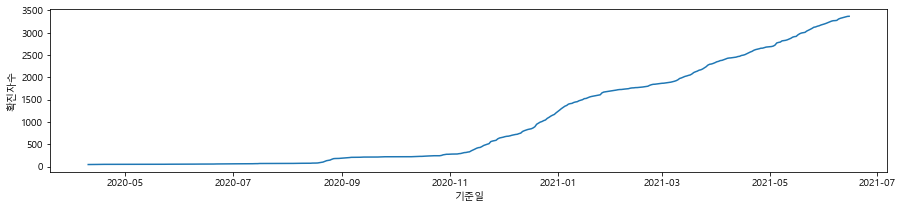

------------충북---------


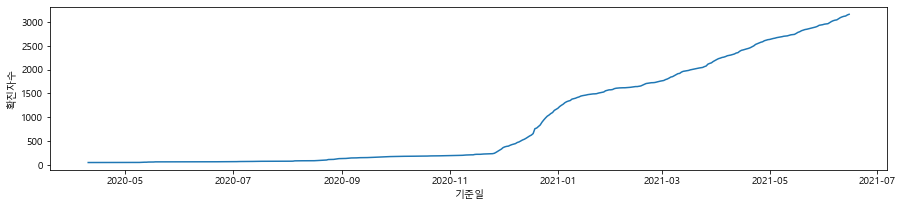

------------충남---------


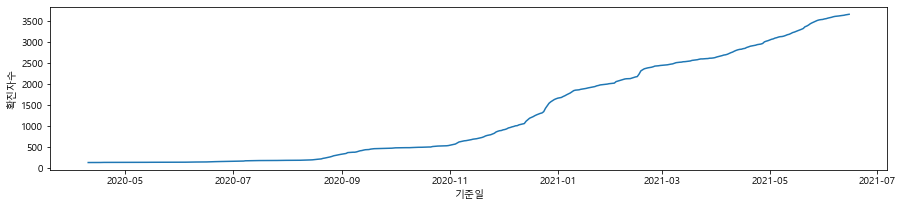

------------전북---------


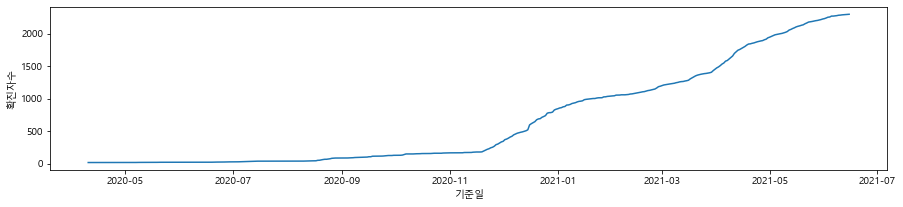

------------전남---------


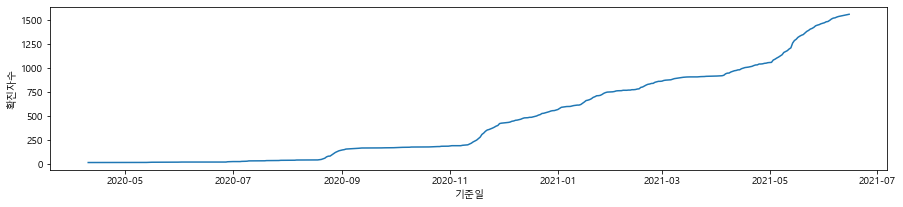

------------경북---------


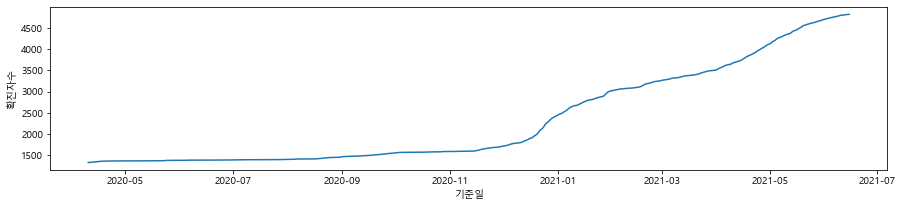

------------경남---------


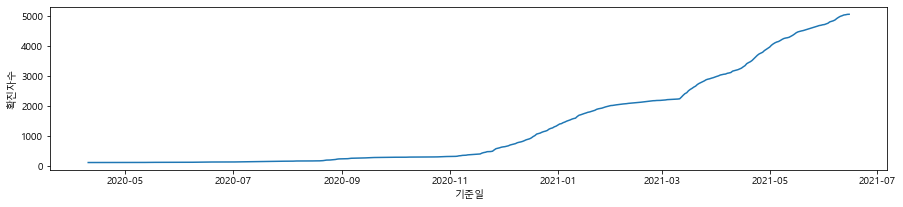

------------제주---------


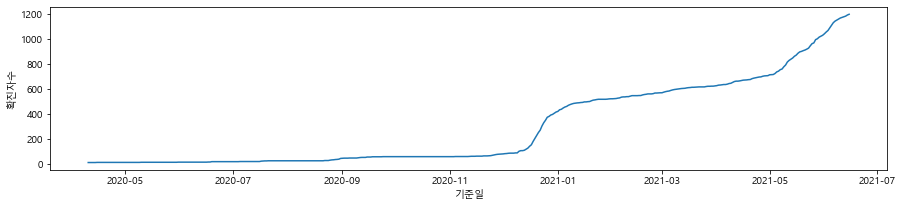

In [58]:
# 지역단위로 그리기
itemList=newDf['지역'].unique()

for item in itemList:
    plt.figure(figsize = (15,3))
    tmp=newDf[newDf['지역']==item]
    print('------------%s---------'%item)
    sns.lineplot(x='기준일',y='확진자수',data=tmp)
    plt.show()